# Uniform Cost Search (UCS) Algorithm:
UCS is an uninformed search algorithm used in the field of Artificial Intelligence for traversing or searching a weighted tree or graph. It expands nodes based on their path cost from the start node, regardless of any heuristic information.

## How UCS Works:
UCS starts with the root node and explores nodes in a priority queue based on the lowest cumulative cost.
It treats all child nodes equally, without any heuristic guidance.
The algorithm is complete and optimal; it will find the least costly path to the goal if one exists.

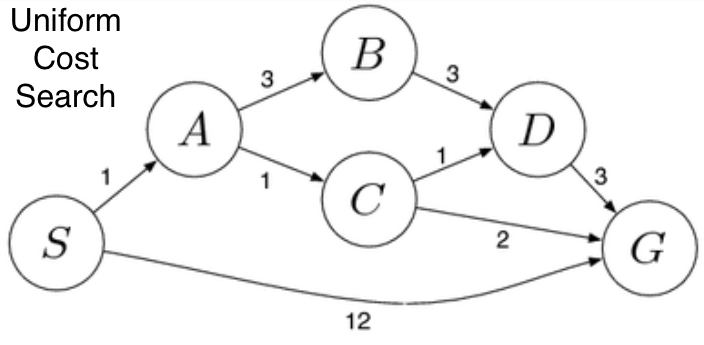

## Algorithm Steps:
1. **Initialize:** Start with an empty priority queue. Add the start node to the queue with a cost of zero.
2. **Loop:** While the queue is not empty, do the following:
  * Remove the node with the lowest cost from the queue.
  * If the node is the goal, return the path and cost.
  * Otherwise, expand the node and add all adjacent nodes to the queue with their corresponding cumulative costs.
3. **Goal Check:** Each time a node is chosen for expansion, check if it’s the goal node.
4. **Path Construction:** Keep track of the path of each node by storing the sequence of nodes that led to it.
5. **Cost Update:** If a node in the queue can be reached with a lower cost from the current node, update its cost in the queue.

In [1]:
import heapq

def uniform_cost_search(graph, start, goal):
    visited = set()
    priority_queue = [(0, start, [])]  # (cost, vertex, path)

    while priority_queue:
        (cost, vertex, path) = heapq.heappop(priority_queue)
        if vertex not in visited:
            visited.add(vertex)
            path = path + [vertex]

            if vertex == goal:
                return (cost, path)

            for next_node, weight in graph.get(vertex, []):
                if next_node not in visited:
                    heapq.heappush(priority_queue, (cost + weight, next_node, path))

    return (float("inf"), [])

# Example usage:
graph = {
    'S': [('A', 1), ('G', 12)],
    'A': [('B', 3), ('C', 1)],
    'B': [('D', 3)],
    'C': [('D', 1), ('G', 2)],
    'D': [('G', 3)]
}
start = 'S'
goal = 'G'
cost, path = uniform_cost_search(graph, start, goal)
print(f"Path: {path}, Cost: {cost}")


Path: ['S', 'A', 'C', 'G'], Cost: 4


# Greedy Best-First Search (GBFS) Algorithm:
The Greedy Best-First Search (GBFS) algorithm is an informed search algorithm used in Artificial Intelligence for finding a path from a start node to a goal node in a graph. It uses a heuristic function to prioritize nodes that are estimated to be closer to the goal.

## How GBFS Works:
1. GBFS starts with the root node and selects the node that appears to be closest to the goal based on the heuristic
2. It uses a priority queue to manage the nodes, prioritizing them based on the heuristic valu
3. The algorithm expands the nodes according to the heuristic value, not the cumulative cost.

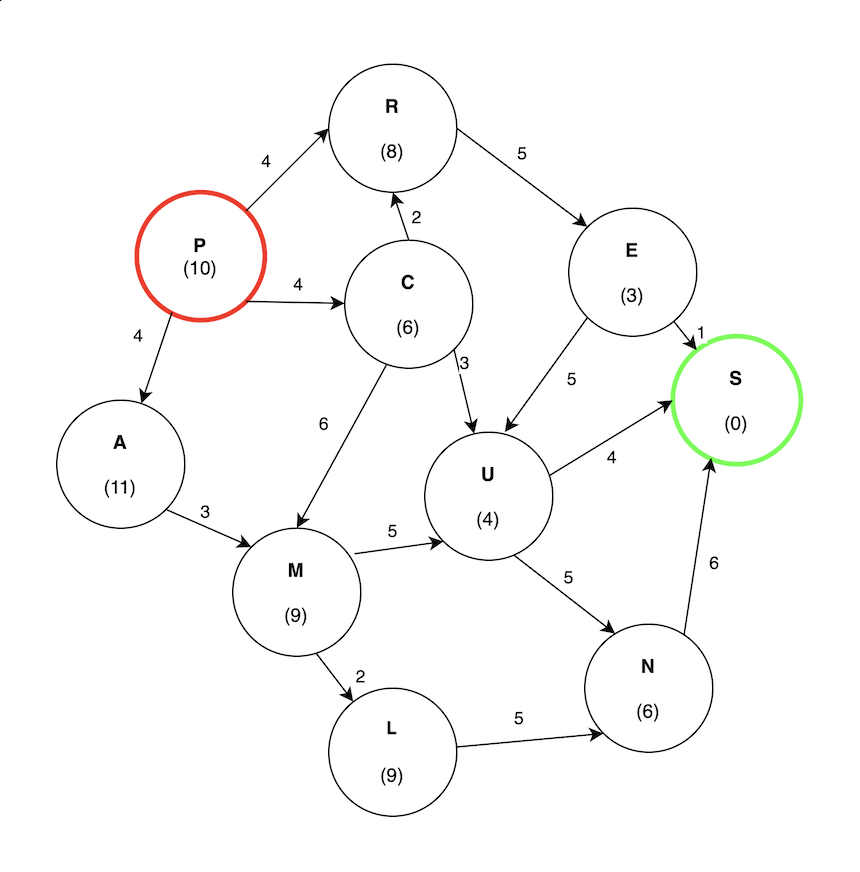

## Key Characteristics:
* **Heuristic-Based:** GBFS uses a heuristic function to estimate the distance to the goal.
* **Non-optimal:** It does not guarantee the shortest path because it only considers the heuristic.
* **Efficiency:** It can be faster than UCS because it follows the path that seems to lead most directly to the goal.

## Algorithm Steps:
1. **Initialize:** Start with an open list containing only the start node.
2. **Loop:** While the open list is not empty:
  * Choose the node with the lowest heuristic value.
  * If it’s the goal, return the path.
  * Otherwise, expand the node and add its children to the open list.
3. **Heuristic Function:** Use a heuristic function to estimate the cost from the current node to the goal.

In [2]:
import heapq

def greedy_best_first_search(graph, start, goal, heuristic):
    visited = set()
    priority_queue = [(heuristic[start], start, [])]  # (heuristic value, vertex, path)

    while priority_queue:
        (h_value, vertex, path) = heapq.heappop(priority_queue)
        if vertex not in visited:
            visited.add(vertex)
            path = path + [vertex]

            if vertex == goal:
                return path, h_value  # Return both the path and the heuristic value

            for next_node in graph.get(vertex, []):
                if next_node not in visited:
                    heapq.heappush(priority_queue, (heuristic[next_node], next_node, path))

    return [], float("inf")  # Return an empty path and infinity cost if no path found

# Example usage:
graph = {
    'A': ['M'],
    'C': ['R', 'M', 'U'],
    'E': ['U', 'S'],
    'L': ['N'],
    'M': ['L', 'U'],
    'N': ['S'],
    'P': ['A', 'C', 'R'],
    'R': ['E'],
    'U': ['S', 'N'],
    
}
heuristic = {
    'A': 11, 'C': 6, 'E': 3, 'L': 9,
    'M': 9, 'N': 6, 'P': 10, 'R': 8,
    'U': 4, 'S': 0,
}
start = 'P'
goal = 'S'
path, cost = greedy_best_first_search(graph, start, goal, heuristic)
print(f"Path: {path}, Cost (Heuristic Value): {cost}")


Path: ['P', 'C', 'U', 'S'], Cost (Heuristic Value): 0
